# 리뷰

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 파일 읽어오기
path = 'https://bit.ly/TitanicFile'
titanic = pd.read_csv(path)
titanic

# 확인
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.shape

(891, 12)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# Survived 열의 범줏값별 개수
titanic.loc[:,'Survived'] # 자료형은 시리즈, 열 데이터는 "값"이라고 한다
titanic['Survived'] # 자료형은 시리즈, 열 데이터는 "값"이라고 한다

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
# Survived 열의 범줏값별 개수
titanic.loc[:,'Survived'].value_counts()
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
# 평균
titanic['Age'].mean()

29.69911764705882

In [19]:
# 평균
titanic.loc[titanic['Survived']==0,'Age'].mean()

30.62617924528302

In [35]:
# 생존자 Age 평균
titanic.loc[titanic['Survived']==1][['Age']].mean()

Age    28.34369
dtype: float64

In [31]:
# 객실 등급별(Pclass) 별 요금(fare) 평균 집계
tmp = titanic.groupby(by='Pclass', as_index=False)[['Fare']].mean()
tmp

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [43]:
tmp.loc[tmp['Pclass']==3][['Fare']].values

array([[13.6755501]])

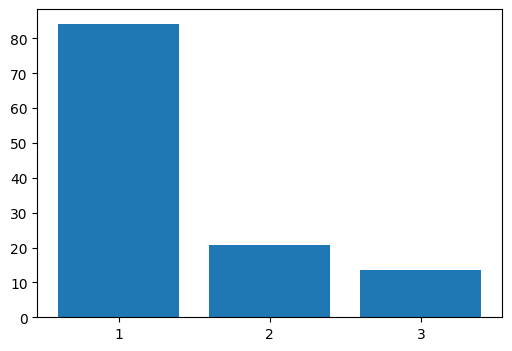

In [46]:
# 시각화
plt.figure(figsize=(6,4))
plt.bar(x=tmp['Pclass'].astype(str), height=tmp['Fare'])
plt.show()

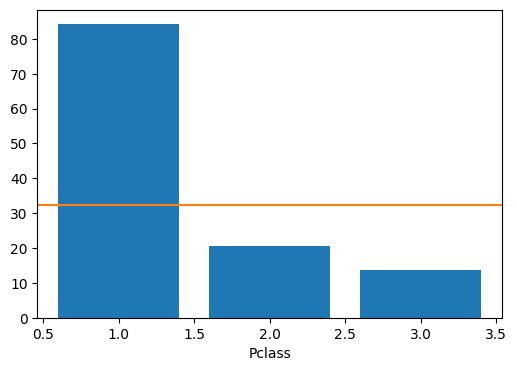

In [51]:
fare_mean = titanic['Fare'].mean()

plt.figure(figsize=(6,4))
plt.bar(x=tmp['Pclass'], height=tmp['Fare'])
plt.axhline(fare_mean, color = 'tab:orange')
plt.xlabel('Pclass')
plt.show()

In [57]:
# 남녀별 탑승자수
titanic.groupby(by='Sex', as_index = False)[['Survived']].count()

,Sex,Survived
0,female,314
1,male,577


In [56]:
# 남녀별 생존자
titanic.groupby(by='Sex', as_index = False)[['Survived']].sum()

,Sex,Survived
0,female,233
1,male,109


In [55]:
# 남녀별 생존율
titanic.groupby(by='Sex', as_index = False)[['Survived']].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908
